In [67]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [68]:
#Generar un conjunto de datos aleatorios
X,y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42)

In [69]:
#importar un archivo
import pandas as pd
data = pd.read_csv('./3. Perceptron.csv')
X=data.iloc[:, :2] #asigna lasd primeras dos colimnas a X (matriz de datos)
y = data.iloc[:, 2] #asigna la tercera columna a y (vector de respuesta/target)

In [70]:
#dividir los datos en conjuntos de entrenamioento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [71]:
# Definir la clase perceptron
class Perceptron:
    def __init__(self, learning_rate=0.1):
        self.learning_rate = learning_rate
        self.weights = np.random.rand(3)
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
            activation = 1
        else:
            activation = 0
        return activation
    def train(self, training_inputs, labels):
        for __ in range(100): # Número de épocas
            for inputs, label in zip(training_inputs, labels):
                inputs = np.array(inputs, dtype=np.float64)
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

In [72]:
# Instanciar y entrenar el perceptron
perceptron = Perceptron()
perceptron.train(np.array(X_train, dtype=np.float64), y_train)

In [73]:
#Armonizando formatos
X_test = np.array (X_test, dtype=np.float64)
perceptron.weights = perceptron.weights.astype(np.float32)

In [74]:
#Verificar la exactitud del modelo
accuracy = sum([1 if perceptron.predict(x) == y else 0 for x, y in zip(X_test, y_test)]) / len(y_test) 
print("Exactitud:", accuracy)
Exactitud: 1.0

Exactitud: 1.0


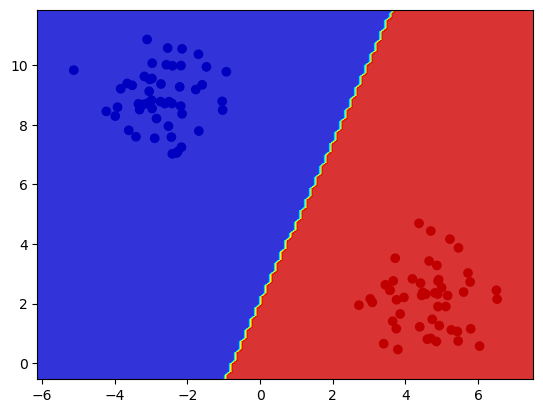

In [75]:
#Visualizar la frontera de decisión
xx, yy = np.meshgrid(np.linspace(X.X.min()-1, X.X.max()+1, 100),
                    np.linspace(X.Y.min()-1, X.Y.max()+1, 100))
Z = np.array([perceptron.predict(x) for x in np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)
plt.scatter(X.X, X.Y, c=y, cmap='jet') 
plt.contourf (xx, yy, Z, alpha=0.8, cmap='jet') 
plt.show()


In [76]:
#Importar librerías 
import tensorflow as tf
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

In [77]:
#Cargar el conjunto de datos 
iris = datasets .load_iris()
X = iris.data[:100] # Solo estamos tomando las primeras 100 muestras para tener una clasificación binaria 
y = iris.target[:100]


In [78]:
#Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:
#Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [80]:
#Crear el modelo de perceptrón multicapa
model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid'),
])

C:\Users\roage\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
#Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [84]:
#Entrenar el modelo
model.fit (X_train, y_train, epochs=50, batch_size=1, verbose=1)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step - accuracy: 0.1840 - loss: 0.8299 
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.4730 - loss: 0.6859   
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.7140 - loss: 0.5781   
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.8925 - loss: 0.5192
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 1.0000 - loss: 0.3920
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 1.0000 - loss: 0.2904
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 1.0000 - loss: 0.2582
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 1.0000 - loss: 0.1615
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 1.0000 - loss: 0.1192
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 1.0000 - loss: 0.0987
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 1.0000 - loss: 0.0812
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 615

In [85]:
#Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Exactitud:{accuracy * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 1.0000 - loss: 6.4791e-04
Exactitud:100.00%
